In [1]:
import pandas as pd
import numpy as nb

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("operations.csv")
data.head()

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,PAYMENT XX XX MTA XX,-24.00,1513.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,PAYMENT XX XX MTA XX,-73.00,1489.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,PAYMENT XX XX XX XX,-14.39,1416.81,OTHER,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
4,2023-04-03,TRANSFER XX XX XX XX XX XX,4.80,1402.42,OTHER,TRANSFER,(not an expense),credit,2023,4,3,Monday,1,False,1


In [7]:
X = "categ" # qualitative
Y = "amount" # quantitative

# Only expenses are retained
sub_sample = data[data["amount"] < 0].copy()

# Convert expense to positive
sub_sample["amount"] = -sub_sample["amount"]

# Exclude category "Rent" because it's too large
sub_sample = sub_sample[sub_sample["categ"] != "RENT"]

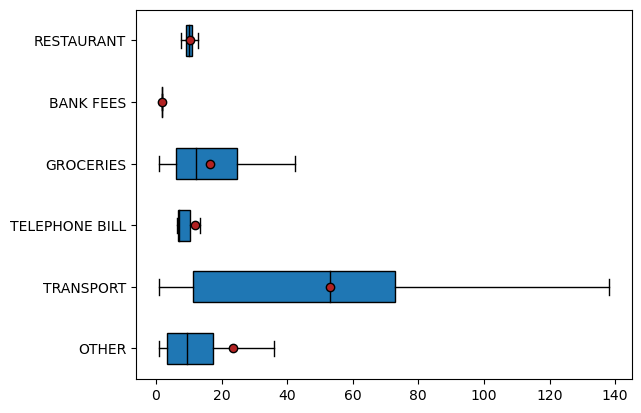

In [16]:
categories = sub_sample["categ"].unique()
groups = []

for m in categories:
    groups.append(sub_sample[sub_sample[X]==m][Y])

# Graph properties
medianprop = {'color':"black"}
meanprop = {'marker':"o", 'markeredgecolor':"black", 'markerfacecolor':"firebrick"}

plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprop, vert=False, patch_artist=True, showmeans=True,meanprops=meanprop)
plt.show()